In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import numpy.random as npr
import plotly as py
import plotly.offline as pyo
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold, train_test_split, GridSearchCV
import requests

In [ ]:
#datasets inladen

df_cred = pd.read_csv(r"C:\Users\Zaidz\Downloads\archive (7)\Credit_card.csv")
df_cred_lab = pd.read_csv(r"C:\Users\Zaidz\Downloads\archive (7)\Credit_card_label.csv")

df_cred_lab.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
#merge de target data set met de rest van de dataset
df2 = df_cred.merge(df_cred_lab, on="Ind_ID", how= "left")
df2

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [ ]:
#drop type occupation simpelweg omdat het te veel verschilende waardes zijn die het kans op overfitting verhogen
df2 = df2.drop("Type_Occupation", axis=1)


In [ ]:

df2 = df2.dropna(subset=["Birthday_count"])


In [ ]:
#annual income nan values vullen met de mean
df2.fillna(value=df2["Annual_income"].mean(), inplace=True)


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1526 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1526 non-null   int64  
 1   GENDER          1526 non-null   object 
 2   Car_Owner       1526 non-null   object 
 3   Propert_Owner   1526 non-null   object 
 4   CHILDREN        1526 non-null   int64  
 5   Annual_income   1526 non-null   float64
 6   Type_Income     1526 non-null   object 
 7   EDUCATION       1526 non-null   object 
 8   Marital_status  1526 non-null   object 
 9   Housing_type    1526 non-null   object 
 10  Birthday_count  1526 non-null   float64
 11  Employed_days   1526 non-null   int64  
 12  Mobile_phone    1526 non-null   int64  
 13  Work_Phone      1526 non-null   int64  
 14  Phone           1526 non-null   int64  
 15  EMAIL_ID        1526 non-null   int64  
 16  Family_Members  1526 non-null   int64  
 17  label           1526 non-null   int64 

In [8]:
df2.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.000000,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
3,5009749,F,Y,N,0,191386.541916,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
5,5009753,191386.541916,Y,N,0,315000.000000,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1


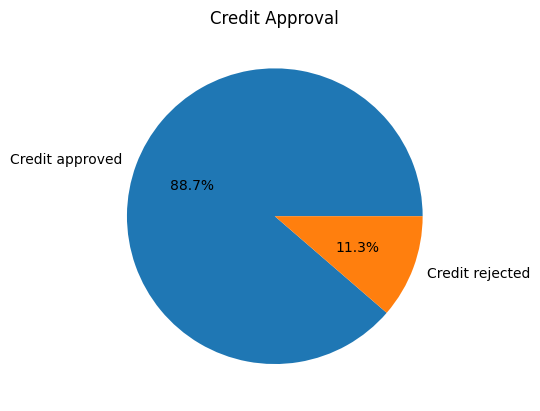

In [ ]:
import matplotlib.pyplot as plt

label_count = df2["label"].value_counts()

labels = ["Credit approved", "Credit rejected"]

plt.pie(label_count, labels=labels, autopct="%1.1f%%")
plt.title("Credit Approval")
plt.show()


In [10]:
df2.groupby("Annual_income")["CHILDREN"].sum()
df2.groupby("Annual_income")["Marital_status"].sum()

Annual_income
33750.0                                       Married
36000.0                                       Married
37800.0                                       Married
40500.0                                MarriedMarried
44550.0                                       Married
                               ...                   
675000.0                         Single / not married
787500.0                                      Married
810000.0                               Civil marriage
900000.0          MarriedMarriedMarriedCivil marriage
1575000.0    Single / not marriedSingle / not married
Name: Marital_status, Length: 116, dtype: object

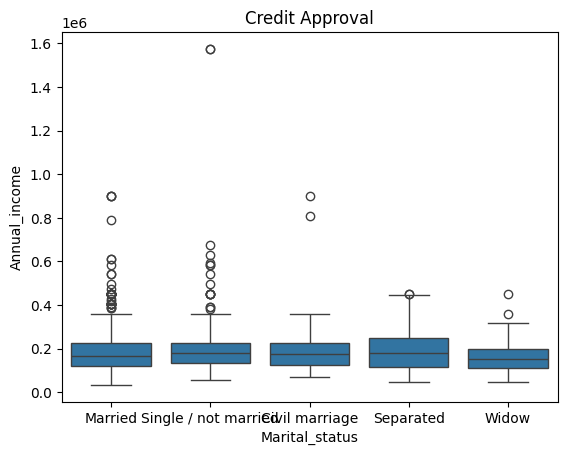

In [11]:
sns.boxplot(
    x="Marital_status",
    y="Annual_income",
    data=df2,
    width=0.8  # This controls box width and hence the spacing
)
plt.title("Credit Approval")
plt.show()

In [ ]:
#map binaire waardes naar nummerieke binaire waardes
df2["GENDER"] = df2["GENDER"].map({"M": 1, "F": 0})
df2["Car_Owner"] = df2["Car_Owner"].map({"Y": 1, "N": 0})
df2["Propert_Owner"] = df2["Propert_Owner"].map({"Y": 1, "N": 0})

In [ ]:

df2["GENDER"] = df2["GENDER"].fillna(1)
df2["GENDER"] = df2["GENDER"].astype(int)
df2["Employed_days"] = df2["Employed_days"].abs()
df2["Birthday_count"] = df2["Birthday_count"].abs()
df2.info()
df2.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1526 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1526 non-null   int64  
 1   GENDER          1526 non-null   int64  
 2   Car_Owner       1526 non-null   int64  
 3   Propert_Owner   1526 non-null   int64  
 4   CHILDREN        1526 non-null   int64  
 5   Annual_income   1526 non-null   float64
 6   Type_Income     1526 non-null   object 
 7   EDUCATION       1526 non-null   object 
 8   Marital_status  1526 non-null   object 
 9   Housing_type    1526 non-null   object 
 10  Birthday_count  1526 non-null   float64
 11  Employed_days   1526 non-null   int64  
 12  Mobile_phone    1526 non-null   int64  
 13  Work_Phone      1526 non-null   int64  
 14  Phone           1526 non-null   int64  
 15  EMAIL_ID        1526 non-null   int64  
 16  Family_Members  1526 non-null   int64  
 17  label           1526 non-null   int64 

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,1,1,1,0,180000.000000,Pensioner,Higher education,Married,House / apartment,18772.0,365243,1,0,0,0,2,1
1,5009744,0,1,0,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,13557.0,586,1,1,1,0,2,1
3,5009749,0,1,0,0,191386.541916,Commercial associate,Higher education,Married,House / apartment,13557.0,586,1,1,1,0,2,1
4,5009752,0,1,0,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,13557.0,586,1,1,1,0,2,1
5,5009753,1,1,0,0,315000.000000,Pensioner,Higher education,Married,House / apartment,13557.0,586,1,1,1,0,2,1


In [ ]:
df2["Marital_status"].value_counts

<bound method IndexOpsMixin.value_counts of 0                    Married
1                    Married
3                    Married
4                    Married
5                    Married
                ...         
1543                 Married
1544    Single / not married
1545                 Married
1546          Civil marriage
1547                 Married
Name: Marital_status, Length: 1526, dtype: object>

In [ ]:
#one hot encode categories van de feature marital_status

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categories = [["Married", "Single / not married", "Civil marriage", "Separated", "Widow"]]
ohe = OneHotEncoder(categories=categories, sparse_output=False, handle_unknown='ignore')

marital_ohe = ohe.fit_transform(df2[["Marital_status"]])  # Note the double brackets

ohe_columns = ohe.get_feature_names_out(["Marital_status"])

marital_df = pd.DataFrame(marital_ohe, columns=ohe_columns, index=df2.index)

df2 = pd.concat([df2.drop(columns=["Marital_status"]), marital_df], axis=1)

df2.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Housing_type,Birthday_count,...,Work_Phone,Phone,EMAIL_ID,Family_Members,label,Marital_status_Married,Marital_status_Single / not married,Marital_status_Civil marriage,Marital_status_Separated,Marital_status_Widow
0,5008827,1,1,1,0,180000.000000,Pensioner,Higher education,House / apartment,18772.0,...,0,0,0,2,1,1.0,0.0,0.0,0.0,0.0
1,5009744,0,1,0,0,315000.000000,Commercial associate,Higher education,House / apartment,13557.0,...,1,1,0,2,1,1.0,0.0,0.0,0.0,0.0
3,5009749,0,1,0,0,191386.541916,Commercial associate,Higher education,House / apartment,13557.0,...,1,1,0,2,1,1.0,0.0,0.0,0.0,0.0
4,5009752,0,1,0,0,315000.000000,Commercial associate,Higher education,House / apartment,13557.0,...,1,1,0,2,1,1.0,0.0,0.0,0.0,0.0
5,5009753,1,1,0,0,315000.000000,Pensioner,Higher education,House / apartment,13557.0,...,1,1,0,2,1,1.0,0.0,0.0,0.0,0.0


In [22]:
df2["EDUCATION"].value_counts()

EDUCATION
Secondary / secondary special    1015
Higher education                  421
Incomplete higher                  67
Lower secondary                    21
Academic degree                     2
Name: count, dtype: int64

In [ ]:
#one hot encode categories van de feature housing type

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categories = [["House / apartment", "With parents", "Municipal apartment", "Rented apartment", "Office apartment", "Co-op apartment"]]
ohe = OneHotEncoder(categories=categories, sparse_output=False, handle_unknown='ignore')

marital_ohe = ohe.fit_transform(df2[["Housing_type"]])  # Note the double brackets

ohe_columns = ohe.get_feature_names_out(["Housing_type"])

marital_df = pd.DataFrame(marital_ohe, columns=ohe_columns, index=df2.index)

df2 = pd.concat([df2.drop(columns=["Housing_type"]), marital_df], axis=1)

df2.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Birthday_count,Employed_days,...,Marital_status_Single / not married,Marital_status_Civil marriage,Marital_status_Separated,Marital_status_Widow,Housing_type_House / apartment,Housing_type_With parents,Housing_type_Municipal apartment,Housing_type_Rented apartment,Housing_type_Office apartment,Housing_type_Co-op apartment
0,5008827,1,1,1,0,180000.000000,Pensioner,Higher education,18772.0,365243,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5009744,0,1,0,0,315000.000000,Commercial associate,Higher education,13557.0,586,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5009749,0,1,0,0,191386.541916,Commercial associate,Higher education,13557.0,586,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5009752,0,1,0,0,315000.000000,Commercial associate,Higher education,13557.0,586,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,5009753,1,1,0,0,315000.000000,Pensioner,Higher education,13557.0,586,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#one hot encode categories van de feature housing type

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categories = [["Secondary / secondary special", "Higher education", "Incomplete higher", "Lower secondary", "Academic degree"]]
ohe = OneHotEncoder(categories=categories, sparse_output=False, handle_unknown='ignore')

marital_ohe = ohe.fit_transform(df2[["EDUCATION"]]) 

ohe_columns = ohe.get_feature_names_out(["EDUCATION"])

marital_df = pd.DataFrame(marital_ohe, columns=ohe_columns, index=df2.index)

df2 = pd.concat([df2.drop(columns=["EDUCATION"]), marital_df], axis=1)

df2.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Birthday_count,Employed_days,Mobile_phone,...,Housing_type_With parents,Housing_type_Municipal apartment,Housing_type_Rented apartment,Housing_type_Office apartment,Housing_type_Co-op apartment,EDUCATION_Secondary / secondary special,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Academic degree
0,5008827,1,1,1,0,180000.000000,Pensioner,18772.0,365243,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5009744,0,1,0,0,315000.000000,Commercial associate,13557.0,586,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5009749,0,1,0,0,191386.541916,Commercial associate,13557.0,586,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5009752,0,1,0,0,315000.000000,Commercial associate,13557.0,586,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,5009753,1,1,0,0,315000.000000,Pensioner,13557.0,586,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
import plotly.express as px
import pandas as pd

corr_matrix = df2.corr(numeric_only=True)

corr_df = corr_matrix.reset_index().melt(id_vars='index')

corr_df.columns = ['Variable1', 'Variable2', 'Correlation']

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    aspect="auto",
    title="Correlation Heatmap (df2)"
)

fig.update_layout(
    xaxis_title="Variables",
    yaxis_title="Variables",
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()


In [ ]:
#split and scale data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y = df2["label"]

X = df2.drop(columns=["label", "Type_Income", "Ind_ID"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# logistische regressie model
lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)


y_pred = lr.predict(X_test_scaled)

# accuracy checken
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9020


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    penalty='l2',
    C=0.5,
    solver='liblinear',
    max_iter=200,
    class_weight='balanced'
)


In [ ]:
# random forrest classifier
Rfc = RandomForestClassifier()

Rfc.fit(X_train_scaled, y_train)


y_pred = Rfc.predict(X_test_scaled)

# accuracy checken
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9444


In [43]:
# 5. Hyperparameter Tuning voor random forrest
param_grid = {
    'n_estimators': [100, 300, 500, 600, 700],
    'max_depth': [6, 10, 20, 30, 50, 60, 80],
    'min_samples_split': [0.01, 0.1, 1, 2, 5],
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best RF params:", grid.best_params_)

c:\Users\Zaidz\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


105 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Zaidz\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Zaidz\miniconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Zaidz\miniconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Zaidz\miniconda3\Lib\site-

Best RF params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
#gradient boosting model

from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train_scaled, y_train)
y_pred = bst.predict(X_test)\

# accuracy checken
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9085


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [300],
    'max_depth': [20],
    'min_samples_split': [2],
}

#grid search
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1)

grid.fit(X_train, y_train)

best_rfc = grid.best_estimator_

In [ ]:
# modelen met elkaar stacken
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report

stack = StackingClassifier(
    estimators=[
        ('lr', lr),
        ('Rfc', best_rfc),
        ('xgb', bst)
    ],
    final_estimator=LogisticRegression()
)
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)
print("Stacking Classifier Report:")
print(classification_report(y_test, y_pred_stack))


Stacking Classifier Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       278
           1       0.92      0.39      0.55        28

    accuracy                           0.94       306
   macro avg       0.93      0.69      0.76       306
weighted avg       0.94      0.94      0.93       306



In [ ]:
#check of het model niet overfit is

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score

# stratifiedkfold opstellen
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = 'accuracy'

#cross-validation runnen
cv_scores = cross_val_score(best_rfc, X_train, y_train, cv=skf, scoring=scoring, n_jobs=-1)

print(f"Cross-validation {scoring} scores: {cv_scores}")
print(f"Mean {scoring}: {cv_scores.mean():.4f}")
print(f"Std {scoring}: {cv_scores.std():.4f}")


Cross-validation accuracy scores: [0.59836066 0.54098361 0.54918033 0.58606557 0.51229508]
Mean accuracy: 0.5574
Std accuracy: 0.0312
